In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# to display charts

%matplotlib inline

In [4]:
# import data

df = pd.read_csv(r'file:///Users/Celona/Downloads/country_vacc_clean.csv', index_col = False)

In [5]:
df.shape

(43145, 15)

In [8]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vacc', 'ppl_vacc',
       'ppl_fully_vacc', 'daily_vacc_raw', 'daily_vacc', 'total_vacc_per_hund',
       'ppl_vacc_per_hund', 'ppl_fully_vacc_per_hund', 'daily_vacc_per_mill',
       'vaccines', 'source_name'],
      dtype='object')

In [7]:
# delete column

del df['Unnamed: 0']

In [9]:
df.corr()

,total_vacc,ppl_vacc,ppl_fully_vacc,daily_vacc_raw,daily_vacc,total_vacc_per_hund,ppl_vacc_per_hund,ppl_fully_vacc_per_hund,daily_vacc_per_mill
total_vacc,1.000000,0.985390,0.943524,0.821179,0.856006,0.153598,0.183043,0.128647,0.098030
ppl_vacc,0.985390,1.000000,0.867260,0.823378,0.890795,0.130904,0.152087,0.086332,0.051391
ppl_fully_vacc,0.943524,0.867260,1.000000,0.621816,0.677298,0.200040,0.211506,0.197102,0.043278
daily_vacc_raw,0.821179,0.823378,0.621816,1.000000,0.977561,0.071223,0.055625,-0.023214,0.126128
daily_vacc,0.856006,0.890795,0.677298,0.977561,1.000000,0.075467,0.069195,-0.016412,0.115688
total_vacc_per_hund,0.153598,0.130904,0.200040,0.071223,0.075467,1.000000,0.981664,0.976968,0.426823
ppl_vacc_per_hund,0.183043,0.152087,0.211506,0.055625,0.069195,0.981664,1.000000,0.927654,0.492890
ppl_fully_vacc_per_hund,0.128647,0.086332,0.197102,-0.023214,-0.016412,0.976968,0.927654,1.000000,0.311115
daily_vacc_per_mill,0.098030,0.051391,0.043278,0.126128,0.115688,0.426823,0.492890,0.311115,1.000000


In [19]:
sub = df[['total_vacc' , 'ppl_vacc' , 'ppl_fully_vacc' , 'daily_vacc', 'total_vacc_per_hund']]

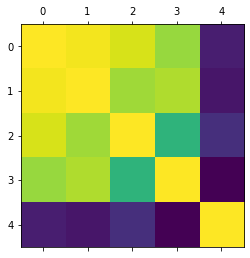

In [20]:
# create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.05, 'Correlation Matrix')

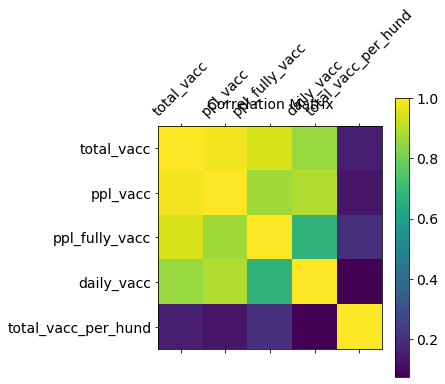

In [21]:
# add labels, a legend, and change size of heatmap

f = plt.figure(figsize=(5, 5)) # figure size
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a color legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### There are a lot of strong positive correlations between these variables. Many of these variables are similar so it's hard to find a good match but between people vaccinated and people fully vaccinated, there's some correlation there. As well as total vaccinated and people vaccinated. 

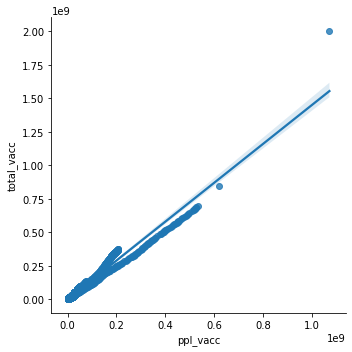

In [23]:
# create a scatterplot for "people vaccinated" and "total vaccinated" columns in seaborn

sns.lmplot(x = 'ppl_vacc', y = 'total_vacc', data = df)

### As expected, there is a very strong relationship between the two. Just to clarify between the ppl_vacc and ppl_fully_vacc columns; people vaccinated does not mean that they're fully immunized. They haven't completed the full set of immunization, which is what the fully vaccinated are. There is an outlier but besides that there may be a  strong correlation between the two. 

In [24]:
# creating subset

sub2 = df[['ppl_vacc', 'ppl_fully_vacc' , 'ppl_vacc_per_hund' , 'ppl_fully_vacc_per_hund']]

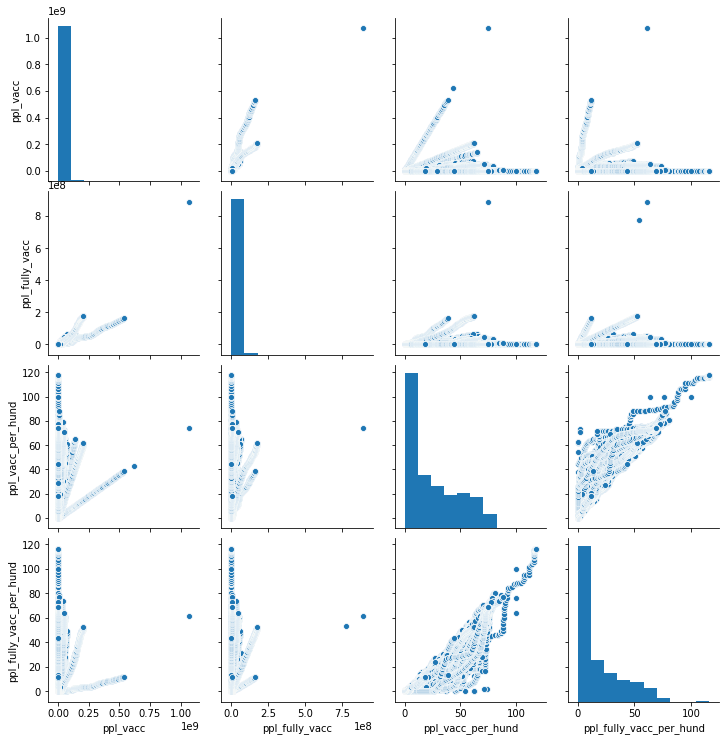

In [25]:
# create a pairplot

g = sns.pairplot(sub2)

### People fully vaccinated per hundred and people vaccinated per hundred show some interesting patterns in the scatterplots. My only question is why people fully vaccinated and people vaccinated are not higher. 

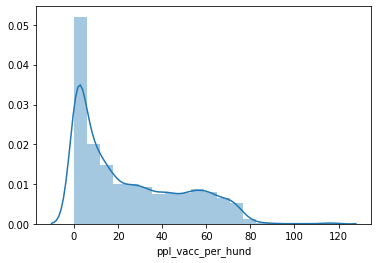

In [30]:
# create categorical plot

sns.distplot(df['ppl_vacc_per_hund'], bins = 20)

### The results show that not many people are getting vaccinated in comparison with the total population. 

In [31]:
df.to_csv('vaccination.csv')